In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [12]:
dataset = pd.read_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/03. Data Normalization/minmax_dataset.csv")

clean_dataset = dataset.drop(columns=["Label"])
clean_dataset

,Flow Duration,Fwd IAT Total,Bwd IAT Total,Fwd PSH Flags,Bwd Init Win Bytes,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.278110,0.277967,0.011145,0.0,0.003708,0.727273,0.273822,0.807669,0.330272,2.022253e-09,Malware
1,0.001026,0.001027,0.000094,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
2,0.070998,0.070903,0.010628,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
3,0.008326,0.008232,0.008102,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
4,0.034303,0.034210,0.008331,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
...,...,...,...,...,...,...,...,...,...,...,...
17909,0.000009,0.000000,0.000000,0.0,0.020890,0.727273,0.982628,0.000000,0.023788,9.839642e-01,Benign
17910,0.000028,0.000000,0.000000,0.0,0.020890,0.727273,0.982623,0.000000,0.023494,9.839594e-01,Benign
17911,0.000095,0.000000,0.000000,0.0,0.000000,0.181818,0.982627,0.000000,0.023742,9.839634e-01,Benign
17912,0.000014,0.000000,0.000000,0.0,0.021149,0.727273,0.982624,0.000000,0.023557,9.839604e-01,Benign


# Low Variance + Pearson Correlation Filter

## Menghapus feature yang memiliki low variance

In [3]:
tres = 0.1

lowvariancefilter = VarianceThreshold(threshold=tres)
lowvariancefilter.fit_transform(clean_dataset)

filtered_cols = clean_dataset.drop(
    columns=clean_dataset.columns[lowvariancefilter.get_support()].array
).columns.array

lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
lowvariance_dataset

,Flow Duration,Fwd IAT Total,Bwd IAT Total,Fwd PSH Flags,Subflow Fwd Packets,Bwd Init Win Bytes,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.278110,0.277967,0.011145,0.0,0.0,0.003708,0.727273,0.273822,0.807669,0.330272,2.022253e-09
1,0.001026,0.001027,0.000094,0.0,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01
2,0.070998,0.070903,0.010628,0.0,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01
3,0.008326,0.008232,0.008102,0.0,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01
4,0.034303,0.034210,0.008331,0.0,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01
...,...,...,...,...,...,...,...,...,...,...,...
17909,0.000009,0.000000,0.000000,0.0,0.0,0.020890,0.727273,0.982628,0.000000,0.023788,9.839642e-01
17910,0.000028,0.000000,0.000000,0.0,0.0,0.020890,0.727273,0.982623,0.000000,0.023494,9.839594e-01
17911,0.000095,0.000000,0.000000,0.0,0.0,0.000000,0.181818,0.982627,0.000000,0.023742,9.839634e-01
17912,0.000014,0.000000,0.000000,0.0,0.0,0.021149,0.727273,0.982624,0.000000,0.023557,9.839604e-01


In [4]:
lowvariance_dataset["Label"] = dataset["Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0        1
1        1
2        1
3        1
4        1
        ..
17909    0
17910    0
17911    0
17912    0
17913    0
Name: Label, Length: 17914, dtype: int8

## Cari korelasi antara fitur dengan target

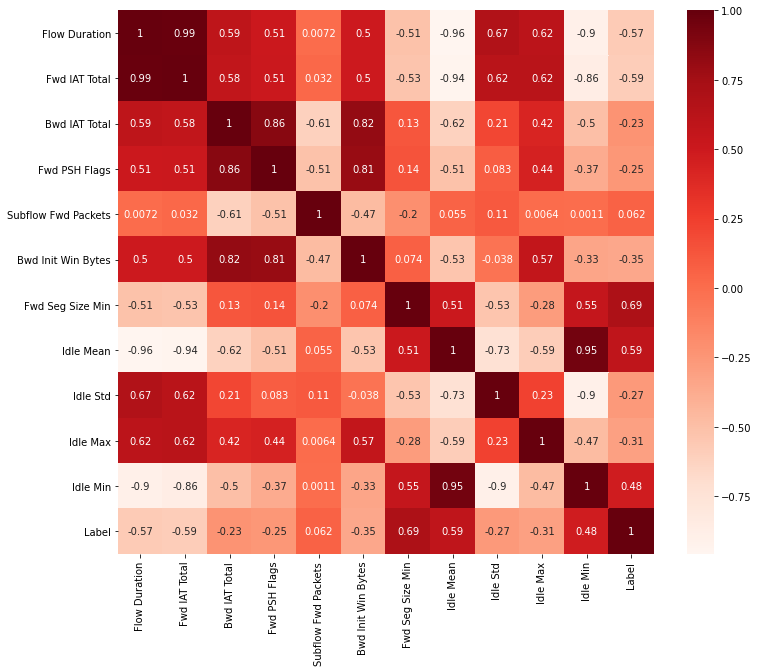

In [5]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
cor_target = abs(cor["Label"])
cor_target

Flow Duration          0.570775
Fwd IAT Total          0.588546
Bwd IAT Total          0.231433
Fwd PSH Flags          0.253029
Subflow Fwd Packets    0.061650
Bwd Init Win Bytes     0.353249
Fwd Seg Size Min       0.694175
Idle Mean              0.585512
Idle Std               0.266430
Idle Max               0.306736
Idle Min               0.480278
Label                  1.000000
Name: Label, dtype: float64

In [7]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

Flow Duration         0.570775
Fwd IAT Total         0.588546
Bwd IAT Total         0.231433
Fwd PSH Flags         0.253029
Bwd Init Win Bytes    0.353249
Fwd Seg Size Min      0.694175
Idle Mean             0.585512
Idle Std              0.266430
Idle Max              0.306736
Idle Min              0.480278
Label                 1.000000
Name: Label, dtype: float64

## Hasil lowvariance filter + pearson correlation filter

In [8]:
all_feature = set(dataset.columns)
rel_feature = set(relevant_features.index)
removed_feature = list(all_feature - rel_feature)
removed_feature

lowvariance_correlationfilter_dataset = dataset.drop(columns=removed_feature)
lowvariance_correlationfilter_dataset

,Flow Duration,Fwd IAT Total,Bwd IAT Total,Fwd PSH Flags,Bwd Init Win Bytes,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.278110,0.277967,0.011145,0.0,0.003708,0.727273,0.273822,0.807669,0.330272,2.022253e-09,Malware
1,0.001026,0.001027,0.000094,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
2,0.070998,0.070903,0.010628,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
3,0.008326,0.008232,0.008102,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
4,0.034303,0.034210,0.008331,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
...,...,...,...,...,...,...,...,...,...,...,...
17909,0.000009,0.000000,0.000000,0.0,0.020890,0.727273,0.982628,0.000000,0.023788,9.839642e-01,Benign
17910,0.000028,0.000000,0.000000,0.0,0.020890,0.727273,0.982623,0.000000,0.023494,9.839594e-01,Benign
17911,0.000095,0.000000,0.000000,0.0,0.000000,0.181818,0.982627,0.000000,0.023742,9.839634e-01,Benign
17912,0.000014,0.000000,0.000000,0.0,0.021149,0.727273,0.982624,0.000000,0.023557,9.839604e-01,Benign


# Principal Component Analysis (PCA)

In [10]:
pca = PCA(0.95)
pca_dataset = pd.DataFrame(pca.fit_transform(clean_dataset), columns=[
    "Feature 1",
    "Feature 2",
    "Feature 3",
    "Feature 4",
    "Feature 5",
    "Feature 6",
    "Feature 7",
    "Feature 8",
    "Feature 9",
])
pca_dataset["Label"] = dataset["Label"]
pca_dataset

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Label
0,0.147808,-0.514771,0.286697,-0.137553,0.913494,0.855905,0.273484,-0.479864,0.440577,Malware
1,-1.022914,-0.885687,0.002199,-0.213661,0.404288,-0.050455,-0.015976,-0.223345,0.395839,Malware
2,-0.906647,-1.049279,-0.090859,-0.119511,0.527799,0.251826,0.079525,-0.229274,0.820235,Malware
3,-0.961825,-1.072027,-0.092086,-0.123172,0.547419,0.261675,0.097636,-0.246404,0.766521,Malware
4,-0.932441,-1.071461,-0.095981,-0.121096,0.543819,0.264623,0.091478,-0.242332,0.799116,Malware
...,...,...,...,...,...,...,...,...,...,...
17909,-1.272618,-0.516196,0.256069,-0.001591,0.236656,-0.174635,-0.357812,-0.020789,-0.113106,Benign
17910,-1.272900,-0.516462,0.256063,-0.000838,0.237219,-0.173486,-0.357441,-0.020440,-0.111875,Benign
17911,-1.213357,-0.449642,0.418320,-0.699023,-0.120048,-0.258811,-0.109428,-0.053669,0.016398,Benign
17912,-1.272611,-0.516280,0.256100,-0.001601,0.236615,-0.174460,-0.357927,-0.020759,-0.113045,Benign


In [11]:
lowvariance_correlationfilter_dataset.to_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/04. Feature Selection/lowvariance_correlationfilter_dataset.csv", index=False)
pca_dataset.to_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/04. Feature Selection/pca_dataset.csv", index=False)